## Imports

In [1]:
import mltlk
print(mltlk.__version__)
from mltlk import *
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

0.1.31


## Load data

In [2]:
session = load_data("data/iris.csv", 
                    shuffle_data=True, 
                    seed=42,
                    encode_categories=True,
                    category_descriptions={0: "Setosa", 1: "Versicolor", 2: "Virginica"},
)

Info: Categories encoded
Info: Loaded 150 examples in 3 categories


#### Show data stats

In [3]:
data_stats(session)

## Evaluate model using cross-validation

#### Neural network

In [4]:
evaluate_model(MLPClassifier(max_iter=2000, random_state=42), 
               session, 
               reload=False,
               mode="CV-10",
               categories=True,
               seed=42,
               top_n=2,
)

Info: Building and evaluating model using 10-fold cross validaton took 2.57 sec



Results,
Accuracy:,97.33%
F1-score:,97.33%
Precision:,97.38%
Recall:,97.33%
Accuracy (top 2):,100.00%
F1-score (top 2):,100.00%


Iris-setosa (0),100.00%,50,50,Setosa
Iris-virginica (2),98.00%,49,50,Virginica
Iris-versicolor (1),2.04%,1,,Versicolor
Iris-versicolor (1),94.00%,47,50,Versicolor
Iris-virginica (2),6.38%,3,,Virginica


#### Random Forest

In [5]:
evaluate_model(RandomForestClassifier(random_state=42), 
               session, 
               reload=True,
               mode="CV-10",
               categories=True,
               seed=42,
               top_n=2,
)

Info: Building and evaluating model using 10-fold cross validaton took 2.01 sec



Results,
Accuracy:,96.00%
F1-score:,96.00%
Precision:,96.00%
Recall:,96.00%
Accuracy (top 2):,100.00%
F1-score (top 2):,100.00%


Iris-setosa (0),100.00%,50,50,Setosa
Iris-virginica (2),94.00%,47,50,Virginica
Iris-versicolor (1),6.38%,3,,Versicolor
Iris-versicolor (1),94.00%,47,50,Versicolor
Iris-virginica (2),6.38%,3,,Virginica


## Build final model and predict example
Build final model using all data and predict an unknown example.

In [6]:
build_model(RandomForestClassifier(), session)

Info: Building final model on all data took 0.21 sec (accuracy 100.00%)


In [7]:
predict([5.0, 3.1, 1.6, 0.18], session)

Info: Example is predicted as Iris-setosa (0)


## Plot data

Feature(numerical),Mean,Median,Min,Max,Stdev
sepal_length,5.8433,5.8000,4.3000,7.9000,0.8253
sepal_width,3.0540,3.0000,2.0000,4.4000,0.4321
petal_length,3.7587,4.3500,1.0000,6.9000,1.7585
petal_width,1.1987,1.3000,0.1000,2.5000,0.7606


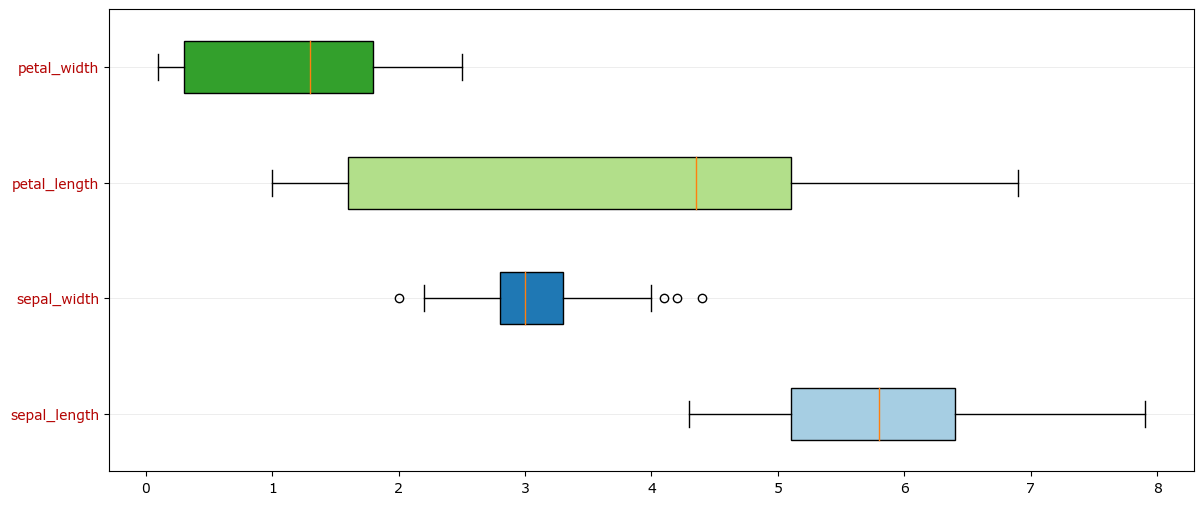

In [8]:
plot_data(session)

### Plot data per category

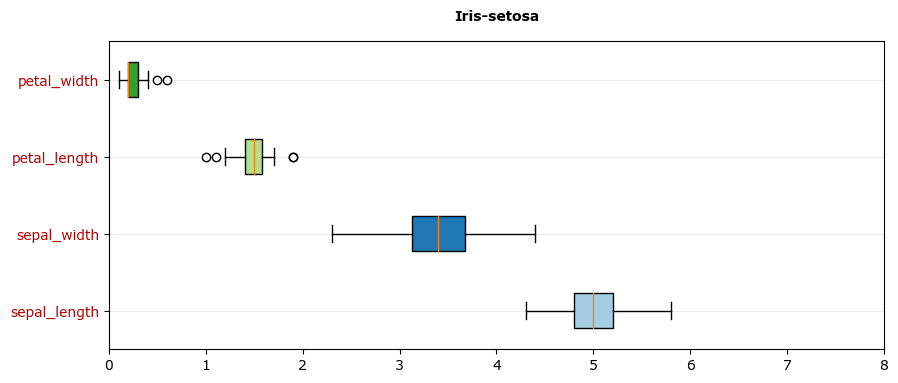

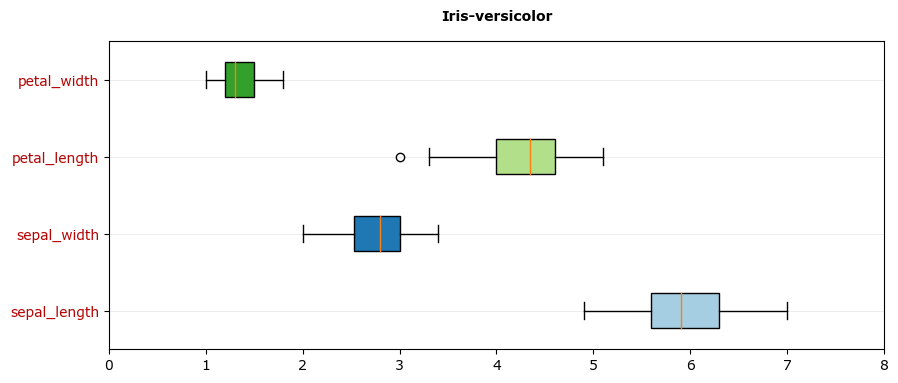

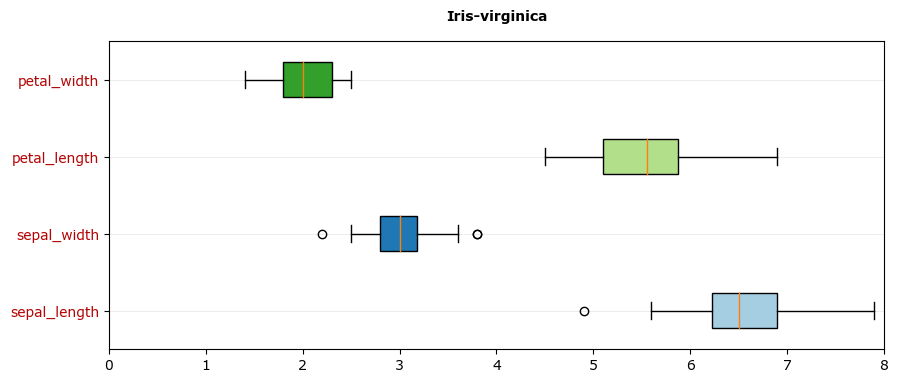

In [9]:
plot_data_per_category(session)

## Test using only 2 features

In [10]:
session2 = load_data("data/iris.csv",
                     preprocess="scale",
                     shuffle_data=True,
                     seed=42,
                     Xcols=[2,3]
)

Info: Scaled input data using standard scaler
Info: Loaded 150 examples in 3 categories


In [11]:
evaluate_model(RandomForestClassifier(random_state=42), 
               session2, 
               reload=False,
               mode="CV-10",
               categories=True,
               seed=42,
               top_n=2,
)

Info: Building and evaluating model using 10-fold cross validaton took 1.82 sec



Results,
Accuracy:,96.00%
F1-score:,96.00%
Precision:,96.00%
Recall:,96.00%
Accuracy (top 2):,100.00%
F1-score (top 2):,100.00%


Iris-setosa,100.00%,50,50
Iris-virginica,94.00%,47,50
Iris-versicolor,6.38%,3,
Iris-versicolor,94.00%,47,50
Iris-virginica,6.38%,3,


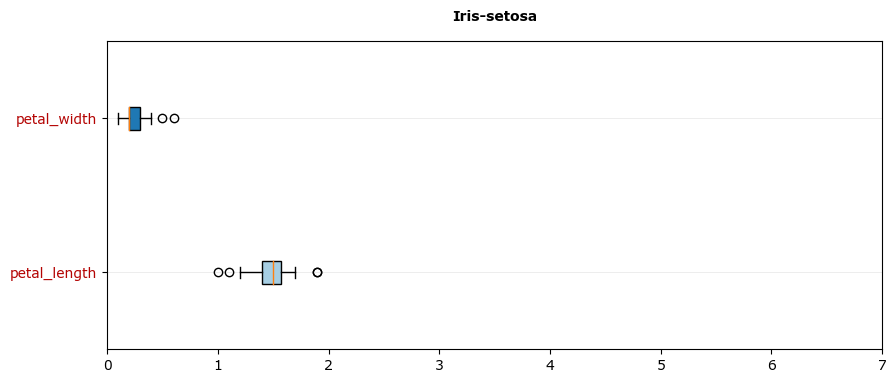

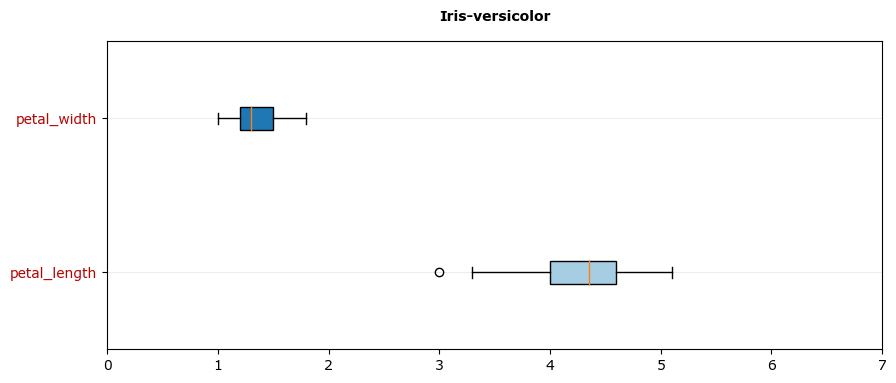

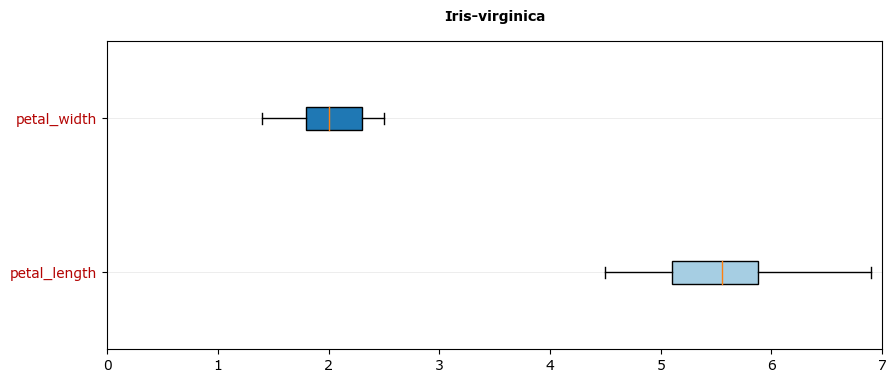

In [12]:
plot_data_per_category(session2)